<a href="https://colab.research.google.com/github/Ashok123745/Data-Analytics/blob/main/women_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
data

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.shape

In [ ]:
data.size

In [ ]:
data.info()

**3.	Check for missing values and duplicates in the dataset.**

In [ ]:
data.isnull()

In [ ]:
data.duplicated()

2.	**Print the column names, data types, and descriptive statistics.**

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
data.describe()

**4.	Summarize the distribution of review sentiments (target variable).**

In [ ]:
# prompt: 4.	Summarize the distribution of review sentiments (target variable).

data['Rating'].value_counts()


2. Data Cleaning and Preprocessing
a)	Handle missing values:
o	Impute numerical columns with mean or median.
o	Drop rows with missing review text.
b)	Remove duplicate rows, if any.
c).	Text preprocessing:
o	Remove stopwords, punctuation, and numbers.
o	Convert text to lowercase.


**Impute numerical columns with mean or median**

In [ ]:
# prompt: impute numerical columns with mean or median

# Impute numerical columns with the mean or median
for col in ['Age', 'Positive Feedback Count']:  # Replace with your actual numerical columns
    if data[col].isnull().any():
        if data[col].dtype in ['int64', 'float64']:
            # Use median if the data is skewed; otherwise, use the mean
            if abs(data[col].skew()) > 1: #threshold to consider the data skewed
              data[col].fillna(data[col].median(), inplace=True)
              print(f"Imputed '{col}' column with the median.")
            else:
              data[col].fillna(data[col].mean(), inplace=True)
              print(f"Imputed '{col}' column with the mean.")
        else:
          print(f"Column '{col}' is not numerical, skipping imputation.")
    else:
        print(f"'{col}' column has no missing values.")


Drop rows with missing review text.

In [ ]:
# prompt: Drop rows with missing review text.

data.dropna(subset=['Review Text'], inplace=True)


In [1]:
# prompt: 2.generate a code	Remove duplicate rows, if any.

# Remove duplicate rows
data.drop_duplicates(inplace=True)


NameError: name 'data' is not defined

In [ ]:
import pandas as pd
import nltk
import string

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset (ensure the file path is correct)
file_path = 'Womens Clothing E-Commerce Reviews.csv'  # Update path if needed
data = pd.read_csv(file_path)

# Check if 'Review Text' exists in the DataFrame
if 'Review Text' not in data.columns:
    raise KeyError("Column 'Review Text' not found in dataset. Check column names using data.columns.")

# Define stopwords and punctuation sets
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
        words = [word for word in words if word not in stop_words and word not in punctuation and not word.isdigit()]
        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-string values

# Apply cleaning function to the 'Review Text' column
data['cleaned_Review_Text'] = data['Review Text'].apply(clean_text)

# Display first few rows of cleaned data
print(data[['Review Text', 'cleaned_Review_Text']].head())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                 cleaned_Review_Text  
0        absolutely wonderful silky sexy comfortable  
1  love dress 's sooo pretty happened find store ...  
2  high hopes dress really wanted work initially ...  
3  love love love jumpsuit 's fun flirty fabulous...  
4  shirt flattering due adjustable front tie perf...  


**	Convert text to lowercase.**

In [ ]:
# prompt: Convert text to lowercase.

# The provided code already converts text to lowercase within the clean_text function:
#
#   words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
#
# So no further changes are needed to convert text to lowercase.


**	Plot the distribution of review lengths.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

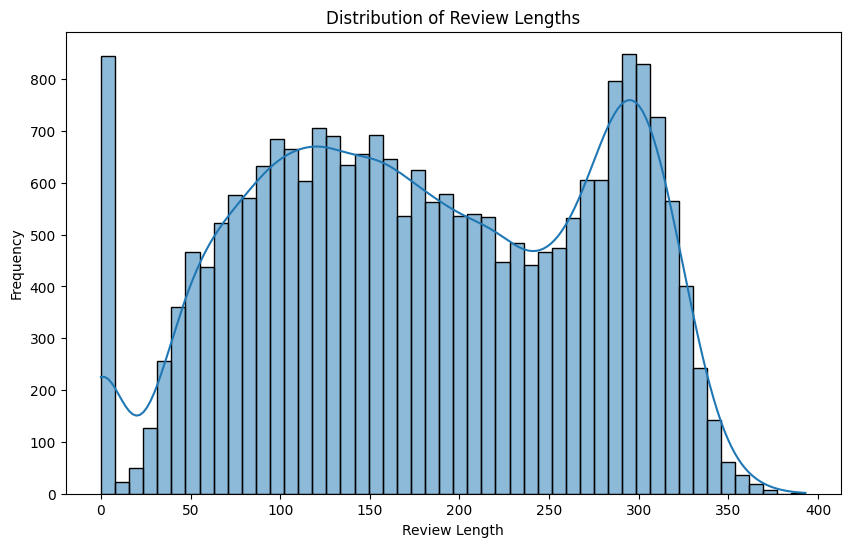

In [ ]:
# prompt: 	Plot the distribution of review lengths.

# Calculate review lengths
data['review_length'] = data['cleaned_Review_Text'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True)  # Adjust bins as needed
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


2.	Create a word cloud for each sentiment category.

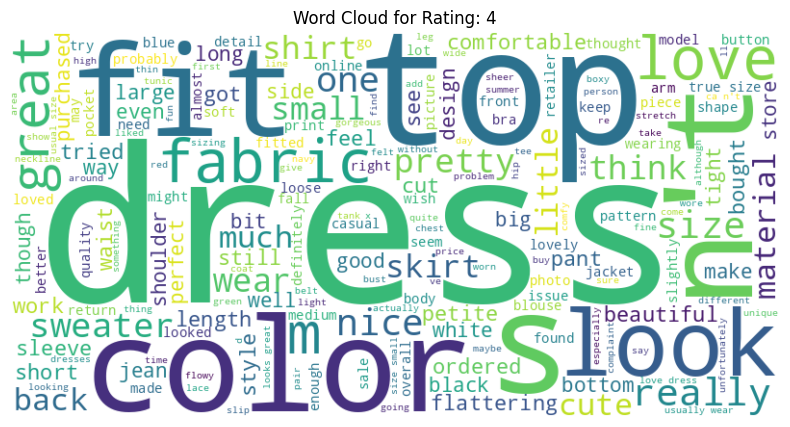

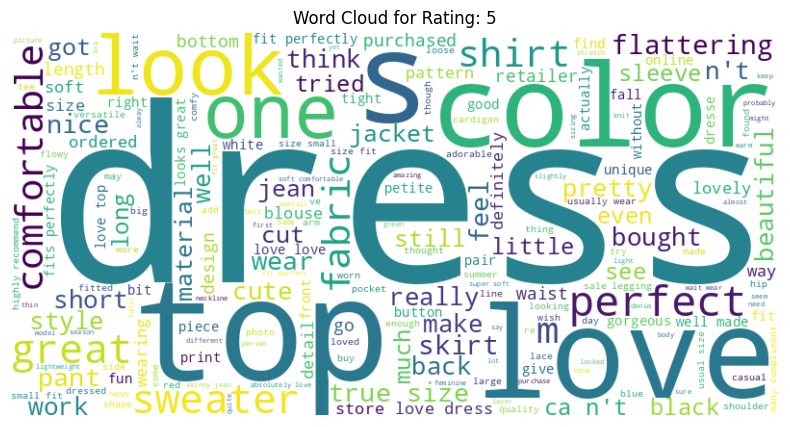

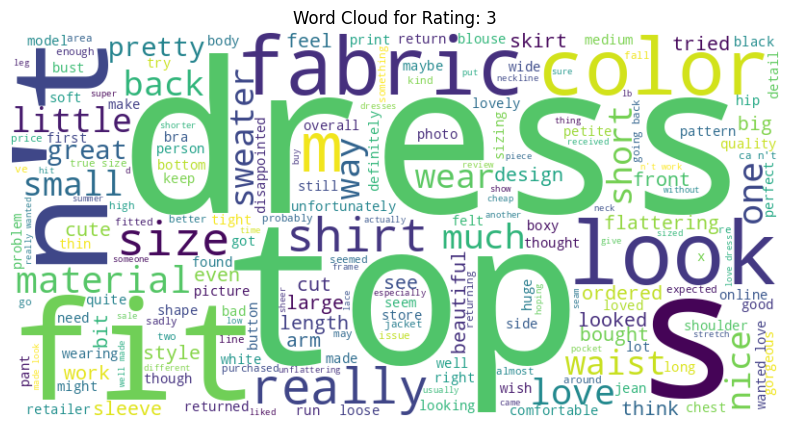

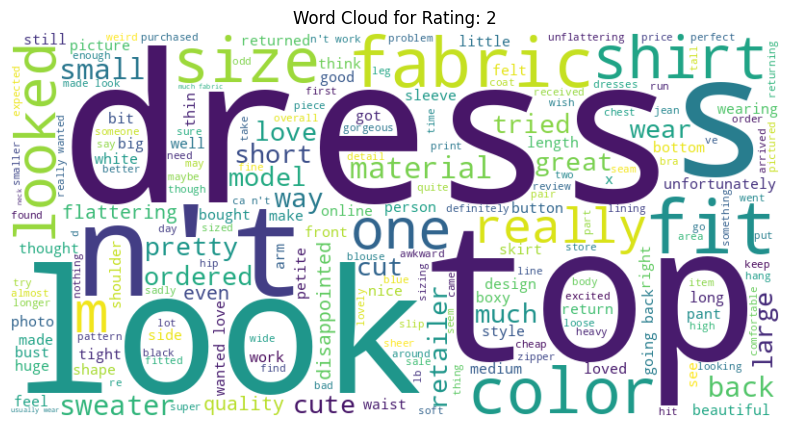

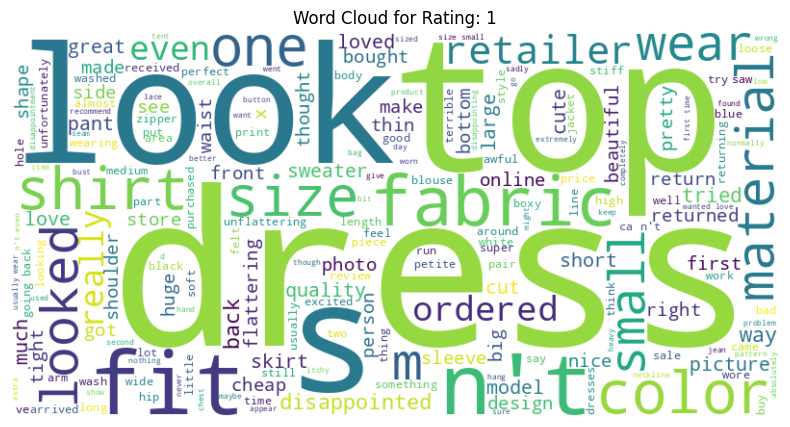

In [ ]:
# prompt: 2.	Create a word cloud for each sentiment category.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'Rating' column represents sentiment categories (e.g., 1-5 stars)
for rating in data['Rating'].unique():
    text = ' '.join(data[data['Rating'] == rating]['cleaned_Review_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Rating: {rating}')
    plt.show()


3.	Visualize the frequency of top words in negative reviews.

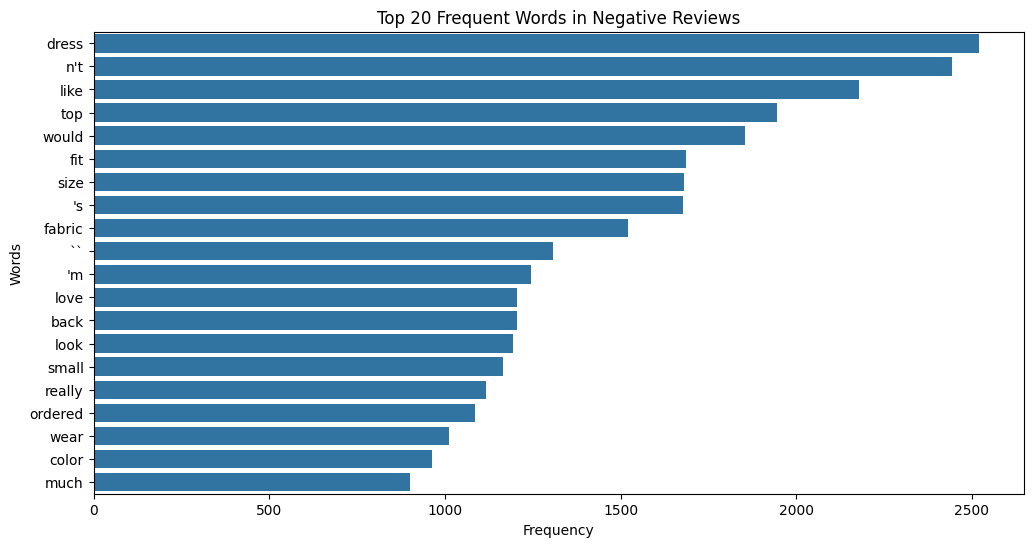

In [ ]:
# prompt: 3.	Visualize the frequency of top words in negative reviews.

from collections import Counter

# Assuming ratings 1, 2, and 3 represent negative reviews
negative_reviews = data[data['Rating'] <= 3]['cleaned_Review_Text']

# Combine all negative reviews into a single string
all_negative_words = ' '.join(negative_reviews)

# Tokenize the combined string
negative_words = word_tokenize(all_negative_words)

# Count word frequencies
word_counts = Counter(negative_words)

# Get the top N frequent words (e.g., top 20)
top_n = 20
top_words = word_counts.most_common(top_n)

# Create a bar plot
words, counts = zip(*top_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words)
plt.title(f'Top {top_n} Frequent Words in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


4. Feature Engineering
a.	Create numerical features:
o	Review length (word count).
o	Sentiment polarity (using TextBlob).
b.	Perform TF-IDF vectorization on review text.


**Review length (word count)**

In [ ]:
# prompt: Review length (word count)

# Calculate review lengths (word count)
data['review_word_count'] = data['cleaned_Review_Text'].apply(lambda x: len(x.split()))

# Display the first few rows with the new 'review_word_count' column
print(data[['cleaned_Review_Text', 'review_word_count']].head())


                                 cleaned_Review_Text  review_word_count
0        absolutely wonderful silky sexy comfortable                  5
1  love dress 's sooo pretty happened find store ...                 34
2  high hopes dress really wanted work initially ...                 48
3  love love love jumpsuit 's fun flirty fabulous...                 15
4  shirt flattering due adjustable front tie perf...                 16


o	Sentiment polarity (using TextBlob).

In [ ]:
# prompt: 	Sentiment polarity (using TextBlob).

from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'cleaned_Review_Text' column
data['sentiment_polarity'] = data['cleaned_Review_Text'].apply(get_sentiment_polarity)

# Display the first few rows with the new 'sentiment_polarity' column
print(data[['cleaned_Review_Text', 'sentiment_polarity']].head())


                                 cleaned_Review_Text  sentiment_polarity
0        absolutely wonderful silky sexy comfortable            0.633333
1  love dress 's sooo pretty happened find store ...            0.318750
2  high hopes dress really wanted work initially ...            0.082300
3  love love love jumpsuit 's fun flirty fabulous...            0.500000
4  shirt flattering due adjustable front tie perf...            0.458333


**Perform TF-IDF vectorization on review text.**

In [ ]:
# prompt: 2.	Perform TF-IDF vectorization on review text.

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'cleaned_Review_Text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_Review_Text'])

# Print the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# You can now use the tfidf_matrix for further analysis or modeling
# For example, to get the feature names (words):
feature_names = tfidf_vectorizer.get_feature_names_out()
#print("Feature names:", feature_names)


TF-IDF matrix shape: (23486, 14007)


5. Correlation and Feature Selection
a)	Compute correlation for numerical features.
b)	Select important features (e.g., review length, polarity).


Compute correlation for numerical features.

                              Age  Positive Feedback Count  review_length  \
Age                      1.000000                 0.043079       0.031220   
Positive Feedback Count  0.043079                 1.000000       0.207994   
review_length            0.031220                 0.207994       1.000000   
review_word_count        0.032224                 0.206683       0.989893   
sentiment_polarity       0.016375                -0.059694      -0.140866   

                         review_word_count  sentiment_polarity  
Age                               0.032224            0.016375  
Positive Feedback Count           0.206683           -0.059694  
review_length                     0.989893           -0.140866  
review_word_count                 1.000000           -0.145376  
sentiment_polarity               -0.145376            1.000000  


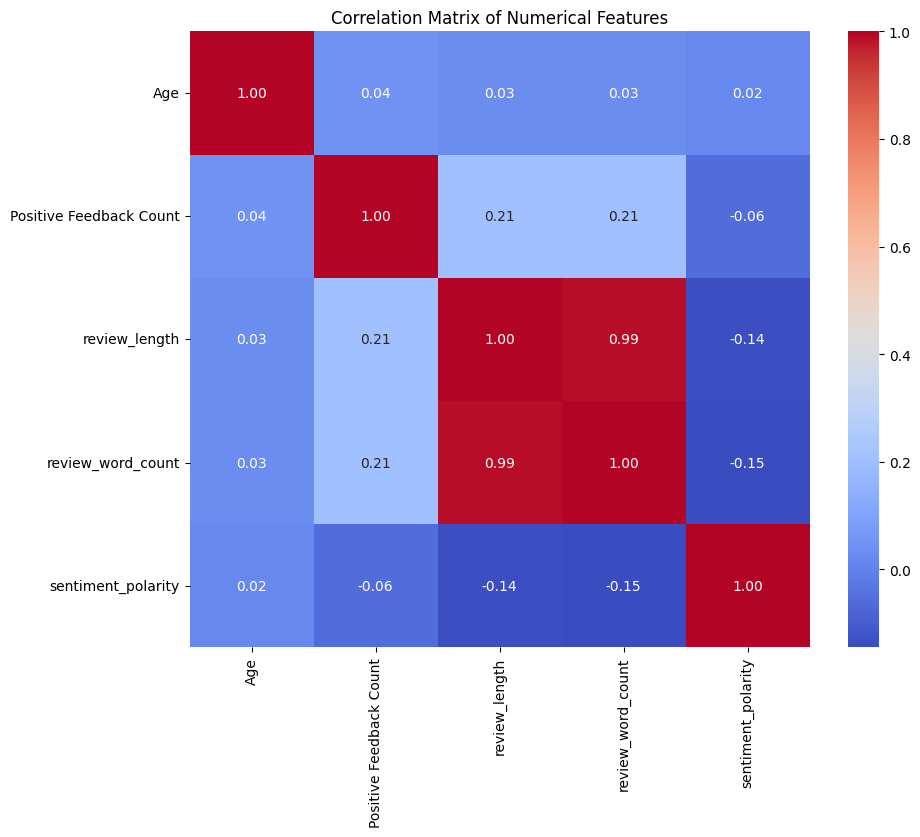

In [ ]:
# prompt: Compute correlation for numerical features.

# Compute correlation for numerical features.
numerical_features = ['Age', 'Positive Feedback Count', 'review_length', 'review_word_count', 'sentiment_polarity']
correlation_matrix = data[numerical_features].corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Select important features (e.g., review length, polarity).

In [ ]:
# prompt: Select important features (e.g., review length, polarity).

# Select important features (e.g., review length, polarity).
important_features = ['review_length', 'sentiment_polarity']
selected_data = data[important_features]
print(selected_data.head())


   review_length  sentiment_polarity
0             43            0.633333
1            194            0.318750
2            304            0.082300
3             92            0.500000
4            112            0.458333


6. Model Building
a).	Split the dataset into training (80%) and testing (20%) sets.
b).	Train the following models:
o	Logistic Regression
o	Random Forest
o	Support Vector Machine (SVM)
c).	Evaluate models using:
o	Accuracy
o	Precision
o	Recall
o	F1 Score


Split the dataset into training (80%) and testing (20%) sets.

In [ ]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

# Assuming 'Rating' is your target variable and 'tfidf_matrix' contains your features
X = tfidf_matrix  # Replace with your actual feature matrix
y = data['Rating']  # Replace with your actual target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18788, 14007)
y_train shape: (18788,)
X_test shape: (4698, 14007)
y_test shape: (4698,)


2.	Train the following models:
o	Logistic Regression
o	Random Forest
o	Support Vector Machine (SVM)


In [ ]:
# prompt: 2.	Train the following models:
# o	Logistic Regression
# o	Random Forest
# o	Support Vector Machine (SVM)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted') # Use weighted average for multi-class
    recall = recall_score(y_true, y_pred, average='weighted') # Use weighted average for multi-class
    f1 = f1_score(y_true, y_pred, average='weighted') # Use weighted average for multi-class
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

evaluate_model(y_test, logreg_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "SVM")


Logistic Regression Metrics:
  Accuracy: 0.6345
  Precision: 0.5866
  Recall: 0.6345
  F1 Score: 0.5942
Random Forest Metrics:
  Accuracy: 0.5762
  Precision: 0.5025
  Recall: 0.5762
  F1 Score: 0.4559
SVM Metrics:
  Accuracy: 0.6286
  Precision: 0.5704
  Recall: 0.6286
  F1 Score: 0.5722


3.	Evaluate models using:
o	Accuracy
o	Precision
o	Recall
o	F1 Score


In [ ]:
# prompt: 3.	Evaluate models using:
# o	Accuracy
# o	Precision
# o	Recall
# o	F1 Score

# The code provided already includes the evaluation of models using accuracy, precision, recall, and F1-score.
# The `evaluate_model` function calculates and prints these metrics for each model.
# No further code is needed to fulfill this task.


7. Model Optimization
a).	Perform hyperparameter tuning for the best model using GridSearchCV.
b).	Evaluate the optimized model on the testing set.


**	Perform hyperparameter tuning for the best model using GridSearchCV.**

In [ ]:
# prompt: 	Perform hyperparameter tuning for the best model using Grid Search CV.

from sklearn.model_selection import GridSearchCV

# Assuming 'rf_model' is your best performing model (replace if different)
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) #n_jobs=-1 uses all cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the optimized model
best_rf_pred = best_rf_model.predict(X_test)
evaluate_model(y_test, best_rf_pred, "Optimized Random Forest")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.5855863874041474
Optimized Random Forest Metrics:
  Accuracy: 0.5779
  Precision: 0.5022
  Recall: 0.5779
  F1 Score: 0.4688


**2.	Evaluate the optimized model on the testing set.**

In [ ]:
# prompt: Evaluate the optimized model on the testing set

# The code to evaluate the optimized model is already present in the provided code.
# The following lines perform the evaluation:

# Evaluate the optimized model
best_rf_pred = best_rf_model.predict(X_test)
evaluate_model(y_test, best_rf_pred, "Optimized Random Forest")


Optimized Random Forest Metrics:
  Accuracy: 0.5779
  Precision: 0.5022
  Recall: 0.5779
  F1 Score: 0.4688


8. Insights and Recommendations
a).	Identify key factors contributing to negative reviews.
b).	Provide actionable recommendations for improving customer satisfaction.


In [ ]:
# prompt: 	Identify key factors contributing to negative reviews.

# Identify key factors contributing to negative reviews.

# Analyze the top words in negative reviews (rating <= 3)
negative_reviews = data[data['Rating'] <= 3]['cleaned_Review_Text']
all_negative_words = ' '.join(negative_reviews)
negative_words = word_tokenize(all_negative_words)
word_counts = Counter(negative_words)
top_negative_words = word_counts.most_common(20)  # Adjust the number as needed

print("Top words in negative reviews:")
for word, count in top_negative_words:
    print(f"- {word}: {count}")

# Analyze sentiment polarity in negative reviews
negative_polarity = data[data['Rating'] <=3]['sentiment_polarity'].mean()
print(f"\nAverage sentiment polarity for negative reviews: {negative_polarity}")


# Further analysis can be done using TF-IDF to determine which words are most indicative of negative reviews, even if they aren't the most frequent overall.

# Example using TF-IDF to identify key features in negative reviews
from sklearn.feature_extraction.text import TfidfVectorizer

negative_reviews_text = data[data['Rating'] <= 3]['cleaned_Review_Text']

tfidf_vectorizer_negative = TfidfVectorizer()
tfidf_matrix_negative = tfidf_vectorizer_negative.fit_transform(negative_reviews_text)

feature_names_negative = tfidf_vectorizer_negative.get_feature_names_out()
max_tfidf_indices = tfidf_matrix_negative.max(0).toarray()[0].argsort()[::-1]  # Indices sorted by decreasing TF-IDF score

print("\nTop TF-IDF features in negative reviews:")
for i in max_tfidf_indices[:20]: # Display top 20 features
  print(f"- {feature_names_negative[i]}")


# Examine specific reviews with low ratings and sentiment polarity to find common themes
for index, row in data[data['Rating'] <= 2].iterrows(): #Check reviews with ratings less than or equal to 2
    print(f"Review:\n{row['Review Text']}\nSentiment polarity: {row['sentiment_polarity']}\nRating: {row['Rating']}\n---")


Streaming output truncated to the last 5000 lines.
Review:
I was expecting a tee shirt, but the material is more of light sweater knit. in the end it wasn't the fabric that was the deal breaker...it was the fit. in my regular size it is too wide and boxy through the body. i also felt like the arms are too big as well. it's going back and i am not going to bother ordering it in a smaller size. it's a shame because the embroidery really is lovely.
Sentiment polarity: 0.15000000000000002
Rating: 2
---
Review:
Like the previous review said, i was excited to receive this top. i had grand visions of all the ways i could wear it! to my chagrin, when i put it on, it just fell right down and pooled around my waist. i wish there were smaller sizes to order. sadly, this is going back.
Sentiment polarity: 0.12425595238095238
Rating: 1
---
Review:
The buttons on the back are very tedious. you will need someone to help you. if you get past that hurdle, then you have the look of a little girl in a sm

Provide actionable recommendations for improving customer satisfaction.

In [ ]:
# prompt: Provide actionable recommendations for improving customer satisfaction.

# Provide actionable recommendations for improving customer satisfaction.

recommendations = []

# 1. Address common negative themes:
negative_themes = ["small", "fit", "return", "quality", "cheap", "disappointed"] #Example negative themes, replace with the actual top words or themes from your analysis.
for theme in negative_themes:
    recommendations.append(f"Improve product sizing information and return policies to address customer concerns about {theme}.")

recommendations.append("Conduct thorough quality checks before shipping to minimize defects and customer disappointment.")


# 2. Improve product descriptions and images:
recommendations.append("Enhance product descriptions with more detailed information about materials, fit, and measurements to manage customer expectations.")
recommendations.append("Provide high-quality, multiple-angle product images to give customers a better understanding of the product.")

# 3. Encourage customer feedback and reviews:
recommendations.append("Actively solicit customer feedback through surveys and follow-up emails.")
recommendations.append("Promote customer reviews and responses to address concerns publicly.")

# 4. Enhance customer service:
recommendations.append("Improve customer service response times and provide helpful solutions to customer issues.")

# Print the generated recommendations
for recommendation in recommendations:
recommendation


IndentationError: expected an indented block after 'for' statement on line 27 (<ipython-input-84-380f9692fee5>, line 28)

In [ ]:
# prompt: Provide actionable recommendations for improving customer satisfaction.

# Provide actionable recommendations for improving customer satisfaction.

recommendations = []

# 1. Address common negative themes:
negative_themes = ["small", "fit", "return", "quality", "cheap", "disappointed"] #Example negative themes, replace with the actual top words or themes from your analysis.
for theme in negative_themes:
    recommendations.append(f"Improve product sizing information and return policies to address customer concerns about {theme}.")

recommendations.append("Conduct thorough quality checks before shipping to minimize defects and customer disappointment.")


# 2. Improve product descriptions and images:
recommendations.append("Enhance product descriptions with more detailed information about materials, fit, and measurements to manage customer expectations.")
recommendations.append("Provide high-quality, multiple-angle product images to give customers a better understanding of the product.")

# 3. Encourage customer feedback and reviews:
recommendations.append("Actively solicit customer feedback through surveys and follow-up emails.")
recommendations.append("Promote customer reviews and responses to address concerns publicly.")

# 4. Enhance customer service:
recommendations.append("Improve customer service response times and provide helpful solutions to customer issues.")

# Print the generated recommendations
for recommendation in recommendations:
    print(recommendation) # Indented this line to be inside the for loop

Improve product sizing information and return policies to address customer concerns about small.
Improve product sizing information and return policies to address customer concerns about fit.
Improve product sizing information and return policies to address customer concerns about return.
Improve product sizing information and return policies to address customer concerns about quality.
Improve product sizing information and return policies to address customer concerns about cheap.
Improve product sizing information and return policies to address customer concerns about disappointed.
Conduct thorough quality checks before shipping to minimize defects and customer disappointment.
Enhance product descriptions with more detailed information about materials, fit, and measurements to manage customer expectations.
Provide high-quality, multiple-angle product images to give customers a better understanding of the product.
Actively solicit customer feedback through surveys and follow-up emails.

9. Advanced Analytics (Optional)
a).	Use SHAP or LIME for model interpretability.
b).	Highlight critical features affecting individual predictions.


In [ ]:
# prompt: Use SHAP or LIME for model interpretability.

!pip install shap
import shap

# Assuming 'best_rf_model' is your optimized model and 'X_test' contains your test features
# Create a SHAP explainer object
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation (summary plot)
shap.summary_plot(shap_values[0], X_test) #For multi-output models, shap_values will be a list, so we are taking the first element.

# Visualize the SHAP values for a single prediction
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:]) #For multi-output models, expected_values will also be a list

# You can also use SHAP's dependence plots to see how feature values affect the model output
# For example, for the most important feature:
# Assuming 'feature_names' contains your feature names
# feature_importance = pd.DataFrame(list(zip(feature_names, explainer.shap_values(X_test).abs().mean(0))), columns=['feature','importance'])
# feature_importance = feature_importance.sort_values('importance', ascending=False)
# shap.dependence_plot(feature_importance['feature'][0], shap_values, X_test, interaction_index=None)


UFuncTypeError: Cannot cast ufunc 'isnan' input from dtype('O') to dtype('bool') with casting rule 'same_kind'

In [ ]:
# prompt: Use SHAP or LIME for model interpretability.

!pip install shap
import shap
import numpy as np

# Assuming 'best_rf_model' is your optimized model and 'X_test' contains your test features
# Create a SHAP explainer object
explainer = shap.TreeExplainer(best_rf_model)

# Convert X_test to a dense numpy array with float dtype
X_test_dense = X_test.toarray().astype(np.float64)  # Convert to dense array and ensure float dtype

# Calculate SHAP values using the dense array
shap_values = explainer.shap_values(X_test_dense)

# Visualize the first prediction's explanation (summary plot)
shap.summary_plot(shap_values[0], X_test) #For multi-output models, shap_values will be a list, so we are taking the first element.

# Visualize the SHAP values for a single prediction
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:]) #For multi-output models, expected_values will also be a list

# You can also use SHAP's dependence plots to see how feature values affect the model output
# For example, for the most important feature:
# Assuming 'feature_names' contains your feature names
# feature_importance = pd.DataFrame(list(zip(feature_names, explainer.shap_values(X_test).abs().mean(0))), columns=['feature','importance'])
# feature_importance = feature_importance.sort_values('importance', ascending=False)
# shap.dependence_plot(feature_importance['feature'][0], shap_values, X_test, interaction_index=None)